In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%cd '/Users/kelson/Documents/DataKind/Red_Cross_Fire/Data/Raw/'




/Users/kelson/Documents/DataKind/Red_Cross_Fire/Data/Raw


In [3]:
## read in shape files and Fires by GEOID

#shp_fl = '2010_Census_shapefiles/tl_2010_0_tract10.shp'
shp_fl = "ustracts_clipped.shp"    
SHP_DF = gpd.read_file(shp_fl)



NFIR_DF = pd.read_csv('../Transformed/NFIRS_2009_2016_Combined_Census_Tract.csv',
                   encoding='latin_1',
                   index_col=0,
                   low_memory=False)




In [42]:
# NFIR: count of all US fires by GEOID over all time  from 2009-2016

NFIR_fl = '../Transformed/Fires_by_GEOID.csv'
NFIR = pd.read_csv(NFIR_fl)


# Drop NA's from GEOID
NFIR =  NFIR.dropna()
# Convert GEOID to strings
NFIR['GEOID'] = NFIR['GEOID'].astype('int').astype('str')
# 01-09 state codes lost their leading zero when stored as int. code below replaces it
fixed_GEOIDS =  [ '0'+ val if len(val) == 10 
                           else val
                           for val in  NFIR['GEOID'].values]
NFIR['GEOID'] = fixed_GEOIDS

  {len(val) for val in NFIR['GEOID']  # should only be one length of GEOID 

IndentationError: unexpected indent (<ipython-input-42-e2ed552107d5>, line 16)

{11}

In [37]:
SHP_Count =  SHP_DF.merge(NFIR , on ='GEOID')

In [38]:
SHP_Count = SHP_Count.loc[:,'GEOID':'COUNT']

In [44]:
SHP_Count.to_file('../Transformed/Fires_by_GEOID.geojson',driver ='GeoJSON')


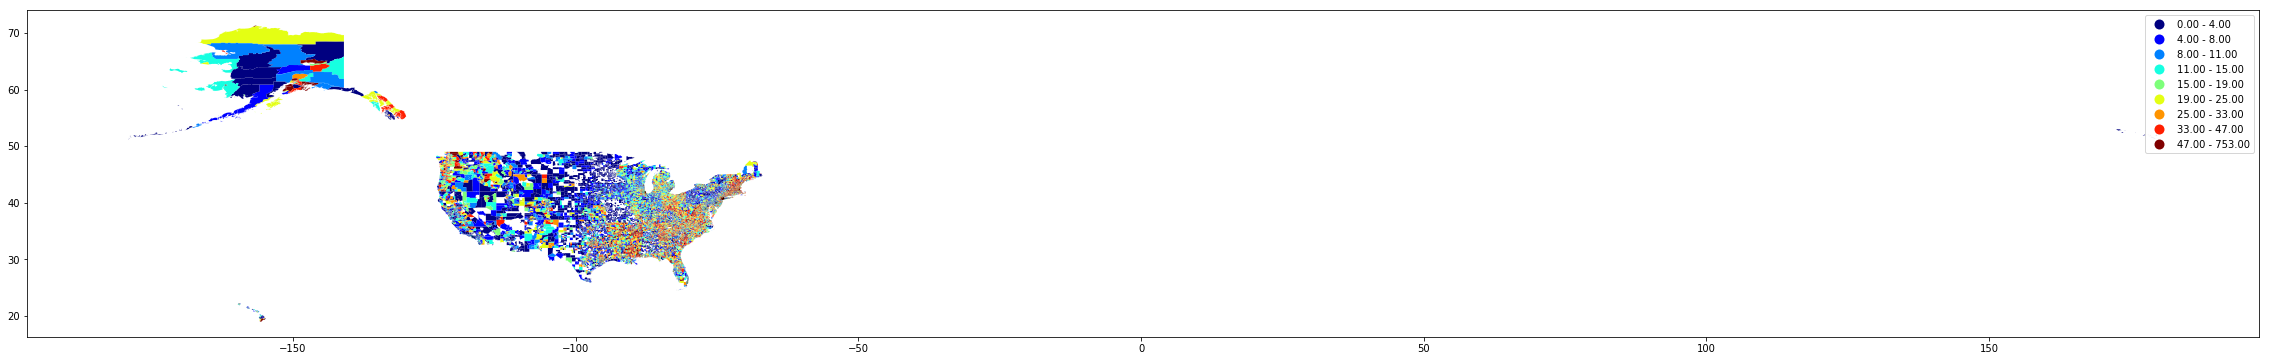

In [40]:
cols = 'COUNT'
colors = 9
cmap = 'jet'
figsize = (40, 60)
ax = SHP_Count.dropna().plot(column=cols, cmap=cmap,scheme = 'quantiles', 
                             figsize=figsize, k=colors, legend='northwest')

In [9]:
SHP_DF.STATEFP.unique()

array(['01', '02', '04', '05', '06', '08', '09', '10', '11', '12', '13',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48',
       '49', '50', '51', '53', '54', '55', '56', '72'], dtype=object)

In [10]:
np.intersect1d(SHP_DF[(SHP_DF.STATEFP == '10' )].GEOID.values,  

SyntaxError: unexpected EOF while parsing (<ipython-input-10-5b12eadf7f3a>, line 1)

In [ ]:
# it seems the shapefile does not have all the correct states 
#  :( CA,AZ,CO,AR,AL seem to be missing!!!

# CA = 60 
# AZ = 40
# CO = 80
# AR = 50
# AL = 10
# 

# so all seem to be there besides CA. perhaps we can regenerate all shapefiles and test
# that fixes problem

In [ ]:
NFIR = NFIR.dropna()

NFIR_CA = NFIR[NFIR.GEOID.str.startswith('60')]
NFIR_AL = NFIR[NFIR.GEOID.str.startswith('10')]
NFIR_CO = NFIR[NFIR.GEOID.str.startswith('80')]

In [ ]:
logbins = np.geomspace(NFIR['COUNT'].min()+1, NFIR['COUNT'].max(),10)

plt.hist(NFIR.COUNT,bins = logbins)
plt.xscale('log')

In [ ]:
logbins

In [ ]:
SHP_DF_AL = SHP_DF[SHP_DF.GEOID.str.startswith('06')]

In [ ]:
SHP_DF_AL.plot()

In [ ]:
#Eureka! It's not plotting because of a conversion error! states whose statecode is 01-09 aren't plotting correctly because 
# when being represented as num instead of as strings they lose the leading 0 

# to illustrate 
ca= NFIR_DF[NFIR_DF.state == 'CA'].GEOID[1] 
md = NFIR_DF[NFIR_DF.state == 'MD'].GEOID[1] 

print('{} is {} chars long \n{} is {} chars long'.format(ca, np.floor(np.log10(ca)),
                                                         md, np.floor(np.log10(md) ) ))

In [ ]:
np.log10(ca)